
# Ciência dos Dados - Projeto 3 #
___

### _Paulo Chavarelli, Lucas Mellis e Mayra Peter - 2C_ ###

## Introdução ##

Esse projeto é um projeto que utiliza de métodos de machine learning para responder a pergunta formulada pelo grupo, se houver um ataque terrorista no dia da posse presidencial de Jair Bolsonaro, dado que seria um ataque armado apenas com armas de fogo, quantas pessoas serão atingidas pelo atentado? Para responde-la, foi necessário primeiramente escolher um tema baseado nos datasets disponíveis na internet, no caso, o tema escolhido foi *global terrorism* e os dados foram coletados do dateset de link https://www.kaggle.com/START-UMD/gtd). Este contém diversas informações sobre atentados que aconteceram ao redor do mundo de 1970 até 2018.

Primeiramente, as colunas do *dataframe* (em um primeiro momento 135) foram analisadas de acordo com a sua relevância, se os membros do grupo acharam que a coluna seria importante para responder a pergunta, ela permaneceu no *dataframe*. Caso contrário, ela foi retirada. Após a filtragem, feita no código abaixo, restaram 23 colunas para serem estudadas.

No trabalho, foi observada a relação entre múltiplos fatores, como o tipo de arma e de ataque utilizado no atentado, o mês no qual o mesmo ocorreu, e o número de pessoas feridas e mortas no atentado com a finalidade de responder a pergunta previamente elaborada.
___

In [1]:
#Importando as bibliotecas

%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [2]:
#Criando o dataframe

data = pd.read_csv("globalterrorismdb_0718dist.csv")
data.head(5)

C:\Users\Lucas\Nova pasta\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#Dividindo, deletando as colunas não relevantes para analise e tirando os NaN's.

analise = data.iloc[:,0:40]
anal = data.iloc[:,41:61]
anal2 = data.iloc[:,61:81]
anal3 = data.iloc[:,81:102]
anal4 = data.iloc[:,102:122]
anal5 = data.iloc[:,122:135]

data_limpa = anal.drop(anal.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19]], axis=1)
data_limpa2 = anal2.drop(anal2.columns[[0,1,2,5,6,11,12,13,14,15,16,17,18,19]], axis=1)
nova = data_limpa.join(data_limpa2)

analise= analise.drop(["approxdate", "resolution", "region","provstate","specificity","vicinity","location","crit1","crit2","crit3","alternative","alternative_txt","multiple","attacktype2","attacktype2_txt","attacktype3","attacktype3_txt","targsubtype1","targtype1"], axis=1)

nova2 = analise.join(nova)

anal3= anal3.drop(["weapsubtype1", "weaptype2", "weaptype2_txt","weapsubtype2","weapsubtype2_txt","weaptype3","weaptype3_txt","weapsubtype3","weapsubtype3_txt","weaptype4","weaptype4_txt","weapsubtype4","weapsubtype4_txt","nkillus","nkillter"], axis=1)
anal4= anal4.drop(["nwoundus", "nwoundte", "ishostkid","nhostkid","nhostkidus","nhours","ndays","divert","kidhijcountry","ransomamtus","ransompaid","ransompaidus","ransomnote","ransomamt"], axis=1)
anal5= anal5.drop(["hostkidoutcome", "hostkidoutcome_txt", "nreleased","related"], axis=1)

x = anal3.join(anal4)
y = x.join(anal5)
data_final = nova2.join(y)

data_final = data_final.drop(['dbsource','scite3','nperps', 'nperpcap', 'claimed', 'weapsubtype1_txt', 'weapdetail', 'property', 'propextent', 'propvalue', 'propcomment', 'ransom', 'scite1', 'scite2','INT_LOG','INT_IDEO','INT_MISC','INT_ANY', 'motive', 'propextent_txt', 'addnotes', 'corp1', 'target1', 'natlty1_txt','extended', 'targsubtype1_txt','summary'], axis=1)

In [4]:
#A coluna "doubtterr" representa a certeza de que o ataque realmente foi realmente terrorista.
#Para doubtterr = 1, a incerteza é grande, o que significa que essas linhas não trazem dados certos para a analise.

df = data_final[data_final.doubtterr != 1]
df = df.drop(['doubtterr'], axis=1)

In [5]:
#Tirando os NaN's

df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [6]:
#Tirando o mês "0"

df = df[df.imonth != 0]

In [7]:
#Nova planilha

df.head(5)

,eventid,iyear,imonth,iday,country,country_txt,region_txt,city,latitude,longitude,...,attacktype1,attacktype1_txt,targtype1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,nkill,nwound
0,197000000001,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1,Assassination,Private Citizens & Property,MANO-D,0.0,0,13,Unknown,1.0,0.0
2,197001000001,1970,1,0,160,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,1,Assassination,Journalists & Media,Unknown,0.0,0,13,Unknown,1.0,0.0
5,197001010002,1970,1,1,217,United States,North America,Cairo,37.005105,-89.176269,...,2,Armed Assault,Police,Black Nationalists,0.0,0,5,Firearms,0.0,0.0
6,197001020001,1970,1,2,218,Uruguay,South America,Montevideo,-34.891151,-56.187214,...,1,Assassination,Police,Tupamaros (Uruguay),0.0,0,5,Firearms,0.0,0.0
8,197001020003,1970,1,2,217,United States,North America,Madison,43.076592,-89.412488,...,7,Facility/Infrastructure Attack,Military,New Year's Gang,0.0,0,8,Incendiary,0.0,0.0


## Adaptando e obtendo dados para análise:

Com o objetivo de obter uma melhor acurácia na resposta da pergunta, foi utilizado o número de pessoas atingidas. Para isso foi preciso somar a coluna do numero de mortos com a coluna do numero de feridos, contudo isso ainda nos gera numeros e para usar o metodo random forest é necessário converter esses numeros para variáveis qualitativas, criando uma nova coluna como foi feito abaixo.
_____
Legenda: *0 = Nenhum(a), maior ou igual à 1 e menor que 50 = Poucos(as), maior ou igual à 50 e menor que 300 = Muitos(as), maior ou igual à 300 = Catastróficos(as)*

In [8]:
#Adicionando a coluna "Atingidos"

df['Atingidos'] = df['nkill'] + df['nwound']

In [9]:
#Adicionando as colunas que classificam o número de mortos, feridos e atingidos

df['Mortes'] = 'Nenhuma'
df['Mortes'][(df['nkill'] >= 1) & (df['nkill'] < 50)] = 'Poucas'
df['Mortes'][(df['nkill'] >= 50) & (df['nkill'] < 300)] = 'Muitas'
df['Mortes'][(df['nkill'] > 300)] = 'Catastróficas'

df['Feridos'] = 'Nenhum'
df['Feridos'][(df['nwound'] >= 1) & (df['nwound'] < 50)] = 'Poucos'
df['Feridos'][(df['nwound'] >= 50) & (df['nwound'] < 300)] = 'Muitos'
df['Feridos'][(df['nwound'] > 300)] = 'Catastrófico'

df['Atingidos2'] = 'Nenhum'
df['Atingidos2'][(df['Atingidos'] >= 1) & (df['Atingidos'] < 50)] = 'Poucos'
df['Atingidos2'][(df['Atingidos'] >= 50) & (df['Atingidos'] < 300)] = 'Muitos'
df['Atingidos2'][(df['Atingidos'] > 300)] = 'Catastrófico'

C:\Users\Lucas\Nova pasta\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lucas\Nova pasta\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Lucas\Nova pasta\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lucas\Nova pasta\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value 

In [10]:
#Nova planilha

df.head(5)

,eventid,iyear,imonth,iday,country,country_txt,region_txt,city,latitude,longitude,...,guncertain1,individual,weaptype1,weaptype1_txt,nkill,nwound,Atingidos,Mortes,Feridos,Atingidos2
0,197000000001,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,0.0,0,13,Unknown,1.0,0.0,1.0,Poucas,Nenhum,Poucos
2,197001000001,1970,1,0,160,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,0.0,0,13,Unknown,1.0,0.0,1.0,Poucas,Nenhum,Poucos
5,197001010002,1970,1,1,217,United States,North America,Cairo,37.005105,-89.176269,...,0.0,0,5,Firearms,0.0,0.0,0.0,Nenhuma,Nenhum,Nenhum
6,197001020001,1970,1,2,218,Uruguay,South America,Montevideo,-34.891151,-56.187214,...,0.0,0,5,Firearms,0.0,0.0,0.0,Nenhuma,Nenhum,Nenhum
8,197001020003,1970,1,2,217,United States,North America,Madison,43.076592,-89.412488,...,0.0,0,8,Incendiary,0.0,0.0,0.0,Nenhuma,Nenhum,Nenhum


## Analise exploratória:

Para verificar quais variaveis seriam mais adequadas e fariam mais sentido para responder a pergunta, foi feita uma analise exploratória dos dados a fim de se observar a correlação e como eles se comportam quando comparadados um ao outro.

_________

### Relação entre o ano de ocorrência e o número de mortos, feridos e atingidos

A correlação entre o ano de ocorrência e o número de mortes é: 0.02369037158407735
A correlação entre o ano de ocorrência e o número de feridos é: 0.015594860165755925
A correlação entre o ano de ocorrência e o número de atingidos é: 0.01832426770288146


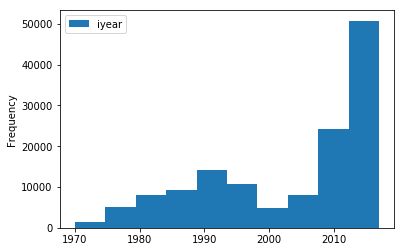

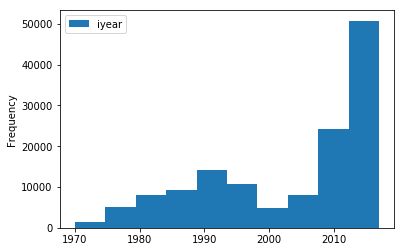

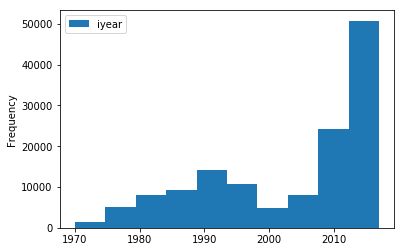

In [11]:
print('A correlação entre o ano de ocorrência e o número de mortes é:', df['iyear'].corr(df['nkill']))
df.plot.hist(x='nkill',y='iyear');

print('A correlação entre o ano de ocorrência e o número de feridos é:',df['iyear'].corr(df['nwound']))
df.plot.hist(x='nwound',y='iyear');

print('A correlação entre o ano de ocorrência e o número de atingidos é:',df['iyear'].corr(df['Atingidos']))
df.plot.hist(x='Atingidos',y='iyear');

Como se pode ver, há uma baixa correlação entre o ano em que o atentado ocorreu e o número de mortos, feridos e atingidos, podendo inferir que o ano não diz nada sobre o  número de pessoas envolvidas. Porém é possível analisar que de 1970 até 1990 os três valores citados anteriormente são majoritariamente crescentes. De 1990 até aproximadade 2001, os mesmos valores diminuem e depois, o número de mortos, feridos e atingidos volta a crescer em uma taxa acelerada.

### Relação entre a arma utilizada e o número de mortos, feridos e atingidos

A correlação entre o tipo de ataque e o número de mortes é: -0.010592339360488168
A correlação entre o tipo de ataque e o número de feridos é: -0.0006988399254606346
A correlação entre o tipo de ataque e o número de atingidos é: -0.002783529940824504


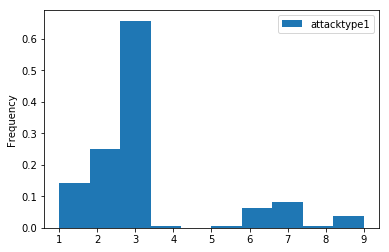

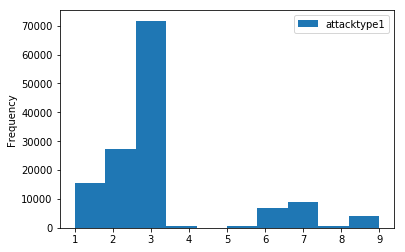

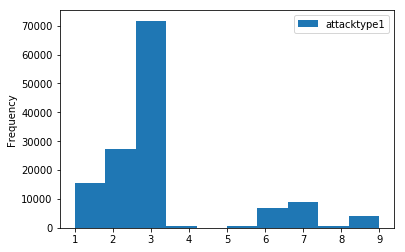

In [12]:
print('A correlação entre o tipo de ataque e o número de mortes é:',df['attacktype1'].corr(df['nkill']))
df.plot.hist(x='nkill',y='attacktype1', density = True);

print('A correlação entre o tipo de ataque e o número de feridos é:',df['attacktype1'].corr(df['nwound']))
df.plot.hist(x='nwound',y='attacktype1');

print('A correlação entre o tipo de ataque e o número de atingidos é:',df['attacktype1'].corr(df['Atingidos']))
df.plot.hist(x='Atingidos',y='attacktype1');

Apesar da baixa correlação, é possível analisar que o tipo 3 de ataque (explosão/bombardeamento) é o mais comum.

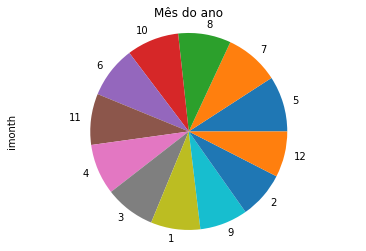

In [13]:
df['imonth'].value_counts().plot(kind='pie');
plt.title('Mês do ano');
plt.axis('equal');

Observando-se o gráfico acima é possivel constatar que os atentados seguem bem destribuidos ao longo do ano, ou seja, não há nenhum mês que chame a atenção por possuir mais ataques.

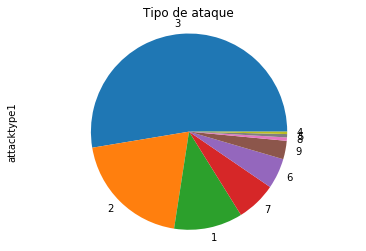

In [14]:
df['attacktype1'].value_counts().plot(kind='pie');
plt.title('Tipo de ataque');
plt.axis('equal');

Lengenda: 

1 = Assassinato;
2 =  Ataque Armado;
3 = Explosão/Bombardeamento;
4 = Sequestro;
5 = Tomada de reféns (incidente de barricada);
6 = Tomada de reféns (sequestro);
7 = Ataque em infraestrutura;
8 = Ataque não armado;
9 = Desconhecido

____________

De acordo com o gráfico acima, pode-se perceber que o tipo de ataque 3, no caso Explosão/Bombardeamento, é o mais comum, seguido pelo 2 que é Assalto Armado.

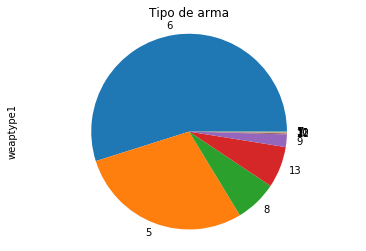

In [15]:
df['weaptype1'].value_counts().plot(kind='pie');
plt.title('Tipo de arma');
plt.axis('equal');

Legenda: 

1 = Arma biológica;
2 = Arma química;
3 = Arma radiológica;
5 = Arma de fogo;
6 = Explosivos;
7 = Armas falsas;
8 = Armas incendiárias;
9 = Melee;
10 = Veículos;
11 = Equipamento de sabotagem;
12 = Outro;
13 = Desconhecido

___________

De acordo com o gráfico acima, pode-se perceber que o tipo de arma 6 (Explosivos) é o mais comum, seguido pelo 5 (Armas de fogo)

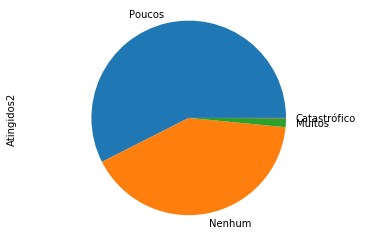

In [16]:
df['Atingidos2'].value_counts().plot(kind='pie');
plt.axis('equal');

De acordo com o gráfico acima, pode-se perceber que na grande maioria dos atentados terroristas, há poucos atingidos ou nenhum atingido

# Scikit Learn:

Para conseguir prever qual seria o número de atingidos foi utilizado o método do random forest. Esse método é um algoritimo de aprendizagem que consiste em construir várias árvores preditivas e juntar todas para obter uma predição mais correta e uma maior acurácia. Para poder utilizá-lo, foi necessário separar as colunas que faziam sentido após a analise exploratoria das variáveis. Dessa forma, foram utilizadas para a previsão somente o mês, a numeração do país, a  numeração do tipo de ataque e a numeração do tipo de arma utilizada para prever quantas pessoas seriam atingidas.
________

In [17]:
#Como o número de atingidos será a variável a sr prevista, Atingidos2 sera a classe

In [18]:
#Criando um novo dataset apenas com as colunas relevantes para a análise

data0=df['country']
#Classe
data1=df['Atingidos2']
data2=df['weaptype1']
data3=df['attacktype1']
data4=df['imonth']

data=pd.DataFrame(data4)

data['attacktype1']=data3
data['weaptype1']=data2
data['country']=data0
data['Class']=data1

data.columns=['Mês','Tipo ataque','Tipo arma','País','Atingidos']

In [19]:
#novo dataset

data.head(5)

,Mês,Tipo ataque,Tipo arma,País,Atingidos
0,7,1,13,58,Poucos
2,1,1,13,160,Poucos
5,1,2,5,217,Nenhum
6,1,1,5,218,Nenhum
8,1,7,8,217,Nenhum


## Criando features:

In [20]:
#Parte do random forest é criar colunas que dizem se o atentado em questão está acima ou abaixo da média para cada categoria

data['Ataque acima da media'] = data['Tipo ataque'] > data['Tipo ataque'].mean()
data['Arma acima da media'] = data['Tipo arma'] > data['Tipo arma'].mean()
data['Mês acima da média'] = data['Mês'] > data['Mês'].mean()
data['País acima da media'] = data['País'] > data['País'].mean()

data.head()

,Mês,Tipo ataque,Tipo arma,País,Atingidos,Ataque acima da media,Arma acima da media,Mês acima da média,País acima da media
0,7,1,13,58,Poucos,False,True,True,False
2,1,1,13,160,Poucos,False,True,False,True
5,1,2,5,217,Nenhum,False,False,False,True
6,1,1,5,218,Nenhum,False,False,False,True
8,1,7,8,217,Nenhum,True,True,False,True


In [21]:
#A correlação entre cada um dos atributos é plotada a seguir

data.corr()

,Mês,Tipo ataque,Tipo arma,País,Ataque acima da media,Arma acima da media,Mês acima da média,País acima da media
Mês,1.000000,0.003926,0.006444,-0.007687,0.002051,0.004962,0.864526,-0.005566
Tipo ataque,0.003926,1.000000,0.614272,0.008527,0.895049,0.635753,0.003410,-0.025182
Tipo arma,0.006444,0.614272,1.000000,-0.010581,0.577366,0.849560,0.006741,-0.023737
País,-0.007687,0.008527,-0.010581,1.000000,0.027287,0.033998,-0.004147,0.642636
Ataque acima da media,0.002051,0.895049,0.577366,0.027287,1.000000,0.698088,0.001375,0.010644
Arma acima da media,0.004962,0.635753,0.849560,0.033998,0.698088,1.000000,0.004886,0.012192
Mês acima da média,0.864526,0.003410,0.006741,-0.004147,0.001375,0.004886,1.000000,-0.003610
País acima da media,-0.005566,-0.025182,-0.023737,0.642636,0.010644,0.012192,-0.003610,1.000000


In [22]:
#Separando o dataset em treinamento e em teste

data_Treinamento=data.head(100000)
data_Teste = data.tail(136339 - 100000)

In [23]:
#Estabelecendo os features (quais colunas vão ser usadas para a predição)

features = data_Treinamento.columns.difference(['Atingidos'])

In [24]:
#Estabelecendo que os features vão estabelecer a quantidade de atingidos no treinamento

x = data_Treinamento[features].values
y = data_Treinamento['Atingidos'].values

xt = data_Teste[features].values
yt = data_Teste['Atingidos'].values

x1 = data[features].values
y1 = data['Atingidos'].values

print(features)

Index(['Arma acima da media', 'Ataque acima da media', 'Mês',
       'Mês acima da média', 'País', 'País acima da media', 'Tipo arma',
       'Tipo ataque'],
      dtype='object')


In [25]:
classifier_data = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=4)
classifier_data.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1986,
            splitter='best')

## Cross validation:

In [26]:
#Medindo a acurácia geral

scores_data = cross_val_score(classifier_data, x, y, scoring='accuracy', cv=5)
print(scores_data.mean())

0.7430991861950558


## Random Forest:

In [27]:
#Medindo a acurácia com random forest

classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=100, max_depth=12, n_jobs=-1)
classifier_rf.fit(x, y)

scores_rf = cross_val_score(classifier_rf, xt, yt, scoring='accuracy', cv=5)
print(scores_rf.mean())

0.7329865351660232


## Feature importance:

In [28]:
#Estabelencendo a importância de cada feature no número de atingidos no dataset inteiro

classifier_rf.fit(x1, y1)  

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

País: 35.755161%
Tipo ataque: 28.470104%
Tipo arma: 22.973655%
Ataque acima da media: 4.779441%
Arma acima da media: 3.091207%
Mês: 2.537431%
País acima da media: 2.208579%
Mês acima da média: 0.184422%


## Respondendo a pergunta: 
A pergunta a ser respondida por esse trabalho é: se houver um ataque terrorista no dia da posse presidencial de Jair Bolsonaro, dado que seria um ataque armado apenas com armas de fogo, quantas pessoas serão atingidas pelo atentado?

Para responder tal pergunta, é necessário criar uma situação levando em conta os seguintes features: Mês, Tipo de ataque, Tipo de arma,	País, Ataque acima da média, Arma acima da média, Mês acima da média e País acima da média. Adequando à situação da pergunta, os features seriam 1 (pois aconteceria em janeiro), 2 (pois seria um ataque armado), 5 (pois haveriam armas de fogo), 30 (pois ocorreria no Brasil) e False para os 4 seguintes atributos, pois todos os valores se encontram abaixo das respectivas médias.

In [29]:
#Inserindo os valores acima em uma váriavel (bolso)

bolso = [1,2,5,30,False, False, False, False]

In [30]:
#Fazendo o fit para o dataset de treinamento e prevendo a situação "bolso"
classifier_rf.fit(x, y)

a = classifier_rf.predict([bolso])
print("Teria {0} atingidos".format(a))

Teria ['Poucos'] atingidos


# Futuras iterações:

Para próximas iterações seria adequado tentar novos métodos de classificação como o svc. Além disso, para melhorar a acurácia e obter uma melhor resposta acerca da pergunta seria interessante utilizar um dataset um pouco mais específico já que o utilizado é muito abrangente no que se diz respeito as variaveis qualitativas. Uma outra maneira de conseguir um melhor resultado de acordo com o cenário construido seria usar dados da segurança pública brasileira, pois dessa maneira seria possivel analisar de forma mais concreta o contexto brasileiro.

# Conclusão:

Após realizar o teste utilizando o método do random forest, foi possível obter uma acurácia de aproximadamente 70%, ou seja, a chance do programa prever corretamente o numero de atingidos (mortos + feridos) levando em conta o mês, o pais, o tipo de arma, e tipo de ataque é de 70%. Número este que representa uma alta probabilidade da previsão estar correta.

De posse de uma boa acurácia pode-se responder a pergunta, se houver um ataque terrorista no dia da posse presidencial de Jair Bolsonaro, dado que seria um ataque armado apenas com armas de fogo, quantas pessoas serão atingidas pelo atentado? Se obteve com resultado de que poucas pessoas (entre 1 e 50) seriam atingidas no suposto atentado.